Gráfica de la función Nº1

Raíces del polinomio → x1 = -152.000000, x2 = -136.000000, x3 = -126.000023, x4 = -125.999979, x5 = -125.999975, x6 = -125.999998, x7 = -125.999994, x8 = -125.999982, x9 = -125.999996, x10 = -125.999988, x11 = -125.999984, x12 = -125.999997, x13 = -125.999995, x14 = -125.999969, x15 = -126.000003


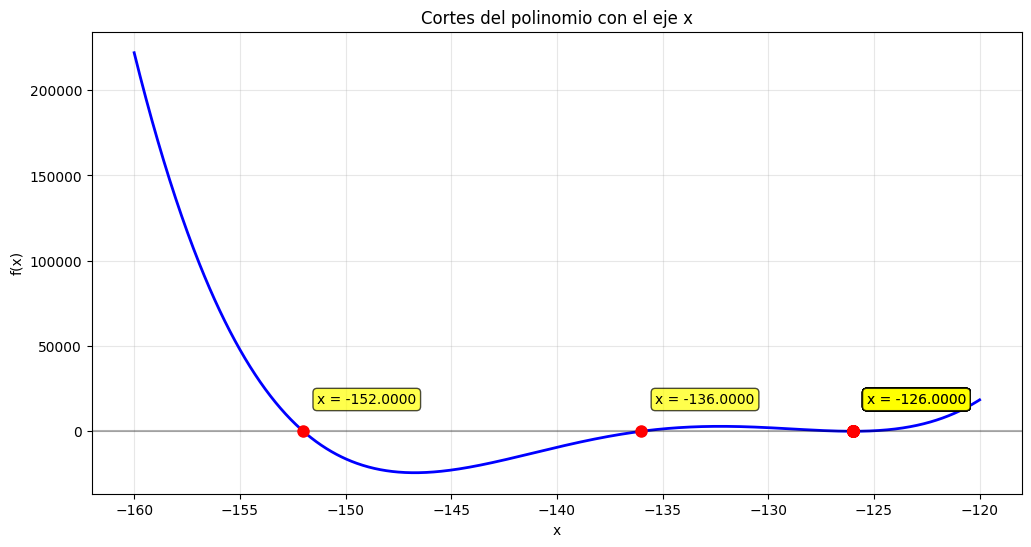

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os

gif_folder = "gifs_ejercicio1"
if not os.path.exists(gif_folder):
    os.makedirs(gif_folder)

def polinomio(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def derivada_polinomio(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

def metodo_newton(f, df, x0, tol=1e-10, max_iter=100):
    x = x0
    historial = [x]
    for i in range(max_iter):
        f_x = f(x)
        if abs(f_x) < tol:
            return x, historial
        df_x = df(x)
        if abs(df_x) < 1e-14:
            return None, historial
        x_next = x - f_x / df_x
        if abs(x_next - x) < tol:
            historial.append(x_next)
            return x_next, historial
        x = x_next
        historial.append(x)
    return None, historial

def encontrar_raices_multiples(f, df, puntos_iniciales, tol=1e-10):
    raices = []
    historiales = []
    for x0 in puntos_iniciales:
        raiz, historial = metodo_newton(f, df, x0, tol)
        if raiz is not None:
            es_nueva = True
            for r in raices:
                if abs(r - raiz) < tol:
                    es_nueva = False
                    break
            if es_nueva:
                raices.append(raiz)
                historiales.append(historial)
    return raices, historiales

def imprimir_raices(raices):
    if not raices:
        print("No se encontraron raíces.")
        return
    texto = ", ".join([f"x{i+1} = {r:.6f}" for i, r in enumerate(raices)])
    print("Raíces del polinomio →", texto)

def crear_animacion_combinada(f, df, historiales, raices, filename):
    fig, ax = plt.subplots(figsize=(12, 8))
    x_min, x_max = -160, -120
    x_vals = np.linspace(x_min, x_max, 1000)
    y_vals = [f(x) for x in x_vals]
    ax.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x)')
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    puntos = []
    lineas_tangente = []
    textos_iter = []
    colors = ['red', 'green', 'purple', 'orange', 'brown']
    for i in range(len(raices)):
        punto, = ax.plot([], [], 'o', markersize=8, color=colors[i % len(colors)], label=f'Raíz {i+1}')
        linea = ax.plot([], [], '--', alpha=0.7, color=colors[i % len(colors)])[0]
        texto = ax.text(0.02, 0.95 - i*0.05, '', transform=ax.transAxes, verticalalignment='top', color=colors[i % len(colors)])
        puntos.append(punto)
        lineas_tangente.append(linea)
        textos_iter.append(texto)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title('Método de Newton-Raphson - Múltiples Raíces')
    ax.grid(True, alpha=0.3)
    ax.legend()
    max_iteraciones = max(len(h) for h in historiales)
    def init():
        for punto in puntos:
            punto.set_data([], [])
        for linea in lineas_tangente:
            linea.set_data([], [])
        for texto in textos_iter:
            texto.set_text('')
        return puntos + lineas_tangente + textos_iter
    def animate(frame):
        for i, (historial, raiz) in enumerate(zip(historiales, raices)):
            if frame < len(historial):
                x_current = historial[frame]
                y_current = f(x_current)
                puntos[i].set_data([x_current], [y_current])
                if frame < len(historial) - 1:
                    x_next = historial[frame + 1]
                    x_tang = np.linspace(x_current - 1, x_current + 1, 50)
                    pendiente = df(x_current)
                    y_tang = y_current + pendiente * (x_tang - x_current)
                    lineas_tangente[i].set_data(x_tang, y_tang)
                textos_iter[i].set_text(f'Raíz {i+1}: x = {x_current:.6f}')
        return puntos + lineas_tangente + textos_iter
    anim = FuncAnimation(fig, animate, init_func=init, frames=max_iteraciones, interval=1000, blit=True)
    filepath = os.path.join(gif_folder, filename)
    anim.save(filepath, writer='pillow', fps=1)
    plt.close()

print("Gráfica de la función Nº1\n")

coeficientes = [1, 540, 109124, 9781632, 328188672]
puntos_iniciales = np.linspace(-200, 0, 20)
raices, historiales = encontrar_raices_multiples(polinomio, derivada_polinomio, puntos_iniciales)
imprimir_raices(raices)
crear_animacion_combinada(polinomio, derivada_polinomio, historiales[:3], raices[:3], "newton_raices_combinadas.gif")

plt.figure(figsize=(12, 6))
x_vals = np.linspace(-160, -120, 1000)
y_vals = [polinomio(x) for x in x_vals]
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='Polinomio')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
for i, raiz in enumerate(raices, 1):
    plt.plot(raiz, 0, 'ro', markersize=8)
    plt.annotate(f'x = {raiz:.4f}', xy=(raiz, 0), xytext=(10, 20),
                 textcoords='offset points', bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Cortes del polinomio con el eje x')
plt.grid(True, alpha=0.3)
graph_path = os.path.join(gif_folder, "cortes_eje_x.png")
plt.savefig(graph_path, dpi=300, bbox_inches='tight')
plt.show()


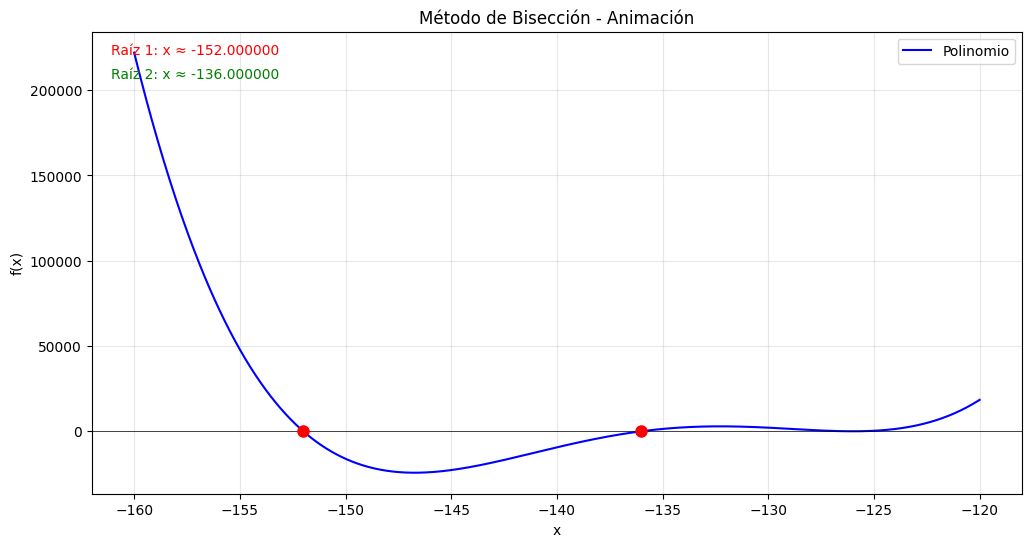

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os

gif_folder = "gifs_biseccion"
if not os.path.exists(gif_folder):
    os.makedirs(gif_folder)

def polinomio(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def metodo_biseccion(f, a, b, tol=1e-10, max_iter=100):
    if f(a)*f(b) >= 0:
        return None, []
    historial = [(a,b,(a+b)/2)]
    for _ in range(max_iter):
        c = (a + b) / 2
        historial.append((a,b,c))
        if abs(f(c)) < tol or (b - a)/2 < tol:
            return c, historial
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    return c, historial

def encontrar_intervalos_cambio_signo(f, x_min, x_max, pasos=1000):
    xs = np.linspace(x_min, x_max, pasos)
    intervalos = []
    for i in range(len(xs)-1):
        a, b = xs[i], xs[i+1]
        if f(a)*f(b) < 0:
            intervalos.append((a,b))
    return intervalos

x_min, x_max = -160, -120
intervalos = encontrar_intervalos_cambio_signo(polinomio, x_min, x_max, pasos=5000)

raices = []
historiales = []
for a, b in intervalos:
    raiz, historial = metodo_biseccion(polinomio, a, b)
    if raiz is not None:
        raices.append(raiz)
        historiales.append(historial)

fig, ax = plt.subplots(figsize=(12,6))
x_vals = np.linspace(x_min, x_max, 1000)
y_vals = [polinomio(x) for x in x_vals]
ax.plot(x_vals, y_vals, 'b-', label='Polinomio')
ax.axhline(0, color='k', lw=0.5)

puntos_a = []
puntos_b = []
puntos_c = []
textos = []

colors = ['red','green','orange','purple','brown']

for i in range(len(raices)):
    pa, = ax.plot([], [], 'o', color='blue', markersize=6)
    pb, = ax.plot([], [], 'o', color='purple', markersize=6)
    pc, = ax.plot([], [], 'ro', markersize=8)
    texto = ax.text(0.02, 0.95 - i*0.05, '', transform=ax.transAxes, color=colors[i % len(colors)])
    puntos_a.append(pa)
    puntos_b.append(pb)
    puntos_c.append(pc)
    textos.append(texto)

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Método de Bisección - Animación')
ax.grid(True, alpha=0.3)
ax.legend()

max_frames = max(len(h) for h in historiales)

def init():
    for pa, pb, pc, txt in zip(puntos_a, puntos_b, puntos_c, textos):
        pa.set_data([],[])
        pb.set_data([],[])
        pc.set_data([],[])
        txt.set_text('')
    return puntos_a + puntos_b + puntos_c + textos

def animate(frame):
    for i, historial in enumerate(historiales):
        if frame < len(historial):
            a, b, c = historial[frame]
            puntos_a[i].set_data([a], [polinomio(a)])
            puntos_b[i].set_data([b], [polinomio(b)])
            puntos_c[i].set_data([c], [polinomio(c)])
            textos[i].set_text(f'Raíz {i+1}: x ≈ {c:.6f}')
    return puntos_a + puntos_b + puntos_c + textos

anim = FuncAnimation(fig, animate, init_func=init, frames=max_frames, interval=500, blit=True)
anim.save(os.path.join(gif_folder, "biseccion_animacion.gif"), writer='pillow', fps=2)
plt.show()

